### IMPORT YAHOO FINANCE

In [62]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


### IMPORT RELEVANT MODULES

In [63]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as si

## TASK 1.1 Historical Data of XRP-USD

In [64]:
# Exporting XRP/USD ($) data for 1 year, 28 March 2022 - 29 March 2023

initial_data = yf.download("XRP-USD", start="2022-03-28", end="2023-03-29")

[*********************100%***********************]  1 of 1 completed


In [65]:
# Returns the first few rows of the head of the XRP Price ($)

initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-28,0.857408,0.908086,0.855211,0.863304,0.863304,3205464277
2022-03-29,0.863089,0.884441,0.848861,0.858000,0.858000,2120020042
2022-03-30,0.857942,0.871279,0.849425,0.860814,0.860814,1832671641
2022-03-31,0.860880,0.870866,0.803881,0.814564,0.814564,2611691934
2022-04-01,0.814709,0.833678,0.810256,0.827740,0.827740,2091887103


In [66]:
# Returns the last few rows of the tail of the XRP Price ($)

initial_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-24,0.444856,0.444874,0.418034,0.425902,0.425902,1314887049
2023-03-25,0.425911,0.463645,0.424218,0.444716,0.444716,1832767576
2023-03-26,0.444675,0.462962,0.442772,0.448817,0.448817,1090501588
2023-03-27,0.448841,0.487613,0.443896,0.479991,0.479991,2730255979
2023-03-28,0.480074,0.529756,0.470201,0.515058,0.515058,3163217119


In [67]:
initial_data['Adj Close'].head()

Date
2022-03-28    0.863304
2022-03-29    0.858000
2022-03-30    0.860814
2022-03-31    0.814564
2022-04-01    0.827740
Name: Adj Close, dtype: float64

In [68]:
initial_data['Adj Close'].tail()

Date
2023-03-24    0.425902
2023-03-25    0.444716
2023-03-26    0.448817
2023-03-27    0.479991
2023-03-28    0.515058
Name: Adj Close, dtype: float64

### Visualisation of the Closing price movement (Line Graph) of XRP-USD ($)

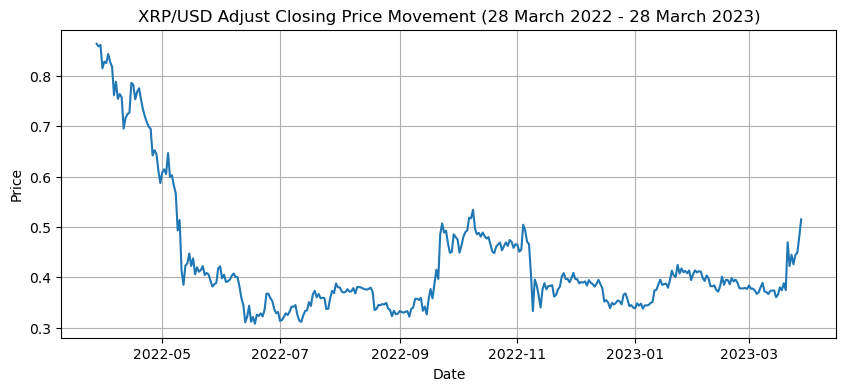

In [69]:
plt.figure(figsize=(10,4))
plt.plot(initial_data.index, initial_data['Close'])
plt.title('XRP/USD Adjust Closing Price Movement (28 March 2022 - 28 March 2023)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

In [70]:
initial_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,0.428431,0.438965,0.415909,0.427498,0.427498,1.422718e+09
std,0.121363,0.123610,0.117954,0.119359,0.119359,8.548565e+08
min,0.308033,0.317014,0.290579,0.308090,0.308090,2.253910e+08
25%,0.358920,0.368778,0.348242,0.358904,0.358904,9.129785e+08
50%,0.386655,0.396137,0.377535,0.386637,0.386637,1.203421e+09
75%,0.448861,0.465911,0.427451,0.448842,0.448842,1.664528e+09
max,0.863089,0.908086,0.855211,0.863304,0.863304,7.798771e+09


## TASK 1.2 Annualised Volatility of XRP-USD

In [71]:
log_return = np.log(initial_data['Adj Close']/initial_data['Adj Close'].shift(1))

In [73]:
vol = np.sqrt(365) * log_return [-183: -1].std()
print('The Annualised Volatility is:', round(vol*100,2),'%')

The Annualised Volatility is: 78.01 %


## Task 2 Derivatives for XRP/USD

### CRR Binominal Tree 

In [74]:
# S = 0.4995      (Spot Asset Price) / XRP/USD price on 28. March 2023
# K = 0.550       Strike Price
# T = 0.25        Time of Maturity / 3 Month European Call
# r = 0.04856     Risk Free Rate (4.856% = 0.04856) / 3 month U.S. Treasury Bill 
# vol = 0.7801    Annualized Volatility (78.01%) 'Volatility of underlying asset'
# N = 5           Number of Periods
# payoff = "put"  Call or Put

In [75]:
S0 = 0.4995
K = 0.550
T = 0.25
r = 0.04856
vol = 0.7801
N = 5
payoff = "put"

In [76]:
dT = float(T) / N               # Delta t
u = np.exp(vol * np.sqrt(dT))   # up factor
d = 1.0 / u                     # down factor 

In [77]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [78]:
S

array([[0.4995    , 0.59469178, 0.70802466, 0.84295585, 1.00360144,
        1.19486192],
       [0.        , 0.41954548, 0.4995    , 0.59469178, 0.70802466,
        0.84295585],
       [0.        , 0.        , 0.35238921, 0.41954548, 0.4995    ,
        0.59469178],
       [0.        , 0.        , 0.        , 0.29598258, 0.35238921,
        0.41954548],
       [0.        , 0.        , 0.        , 0.        , 0.24860491,
        0.29598258],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.20881095]])

In [79]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.46343415559376955

In [80]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.13045452],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.25401742],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.34118905]])

#### European Option 

In [81]:
# European Put Option for XRP/USD
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.10595005, 0.05784783, 0.02000621, 0.        , 0.        ,
        0.        ],
       [0.        , 0.14797615, 0.09079387, 0.03737629, 0.        ,
        0.        ],
       [0.        , 0.        , 0.19803514, 0.13734221, 0.06982769,
        0.        ],
       [0.        , 0.        , 0.        , 0.25135309, 0.19627701,
        0.13045452],
       [0.        , 0.        , 0.        , 0.        , 0.30006131,
        0.25401742],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.34118905]])

In [90]:
print('The European Put Option for XRP/USD is:', str(V[0,0]))

The European Put Option for XRP/USD is: 0.10595004764352735


### Monte Carlo Simulation

In [21]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [22]:
T = 0.25 
r = 0.04856
sigma = 0.7801
S0 = 0.4995
K = 0.550 

In [23]:
S = mcs_simulation_np(10000)

In [24]:
S = np.transpose(S)
S

array([[0.4995    , 0.49722801, 0.4980727 , ..., 0.50190895, 0.50106447,
        0.4999616 ],
       [0.4995    , 0.49714971, 0.49675232, ..., 0.39408506, 0.39336921,
        0.39392563],
       [0.4995    , 0.49622377, 0.49842721, ..., 0.65882417, 0.65906815,
        0.65505213],
       ...,
       [0.4995    , 0.49954074, 0.49856406, ..., 0.50194361, 0.50306159,
        0.50672982],
       [0.4995    , 0.49807132, 0.49596534, ..., 0.423318  , 0.4238577 ,
        0.42489735],
       [0.4995    , 0.49878505, 0.49776909, ..., 0.46993053, 0.47133294,
        0.47372048]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

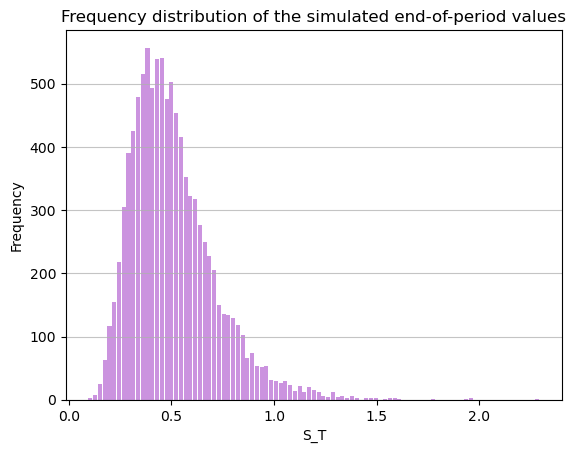

In [25]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#b666d2',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

In [26]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('The European Put Option is:' + ' $', str(p.round(4)))

The European Put Option is: $ 0.104


## TASK 3 GREEKS

### 1 - DELTA, ∆, Unit: Dollar $

##### Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

In [27]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [108]:
delta(0.4995, 0.5500, 1, 0.04856, 0, 0.7801, 'put')

-0.37113868142668816

In [109]:
delta(0.4995, 0.5500, 1, 0.04856, 0, 0.7801, 'call')

0.6288613185733118

In [105]:
S = np.linspace(0.200,1,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 0.5500, 1, 0.04856, 0, 0.7801, 'put')
    Delta_Call [i] = delta(S[i], 0.5500, 1, 0.04856, 0, 0.7801, 'call')

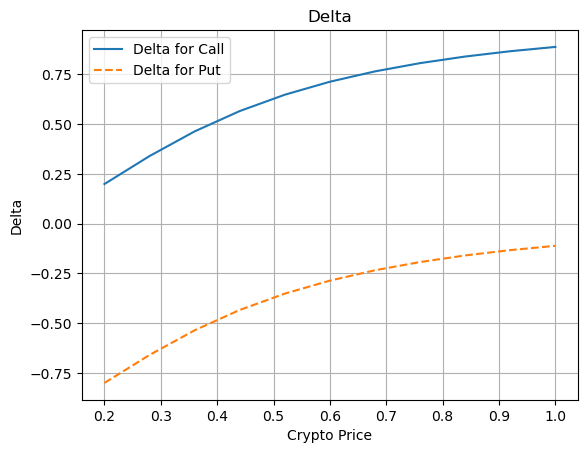

In [106]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Crypto Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [107]:
d = delta(0.4995, 0.5500, 1, 0.04856, 0, 0.7801, 'put')
print('Value of Delta is', d.round(4),'.','If XRP increase by 1 dollar, then the value of the option will decrease $', d.round(4))


Value of Delta is -0.3711 . If XRP increase by 1 dollar, then the value of the option will decrease $ -0.3711


### 2 - GAMMA, Γ, Unit: No-Unit

##### Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.

In [95]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [101]:
gamma(0.4995, 0.5500, 1, 0.04856, 0, 0.7801, 'put')

0.96993594793662

In [102]:
gamma(0.4995, 0.5500, 1, 0.04856, 0, 0.7801, 'call')

0.96993594793662

In [112]:
S = np.linspace(0.200,1,11)
gamma_values = np.zeros((len(S),1))
for i in range(len(S)):
    gamma_values [i] = gamma(S[i], 0.5500, 1, 0.04856, 0, 0.7801, 'put')

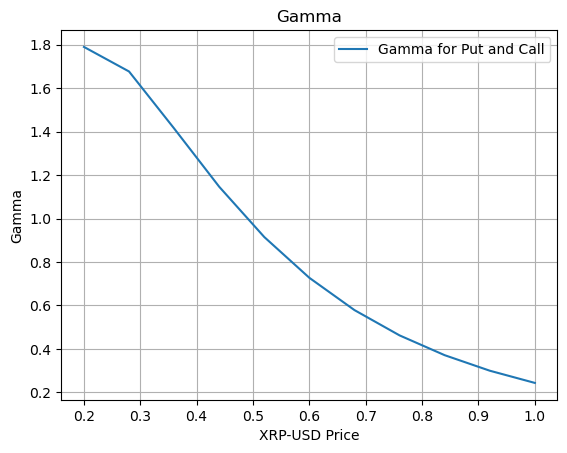

In [121]:
fig = plt.figure()
plt.plot(S, gamma_values, '-')
plt.grid()
plt.xlabel('XRP-USD Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put and Call'])

In [119]:
put_gamma = gamma(0.4995, 0.5500, 1, 0.04856, 0, 0.7801, 'put')
print('Gamma for the put option is', put_gamma.round(4),'.','Meaning if XRP increase by 1 dollar, the value of the delta will change by', put_gamma.round(4))

Gamma for the put option is 0.9699 . Meaning if XRP increase by 1 dollar, the value of the delta will change by 0.9699


### 3 - SPEED, Unit: No-Unit

##### Speed measures the rate of change in Gamma with respect to changes in the underlying price.

In [39]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [40]:
speed(0.4995, 0.5500, 1, 0.04856, 0, 0.7801, 'put')

-2.7603550896931193

In [41]:
speed(0.4995, 0.5500, 1, 0.04856, 0, 0.7801, 'call')

-2.7603550896931193

In [42]:
S = np.linspace(0.200,1,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 0.5500, 1, 0.04856, 0, 0.7801, 'put')

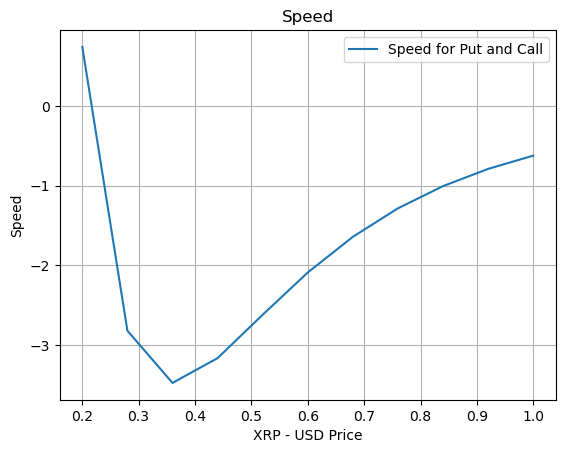

In [120]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('XRP - USD Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put and Call'])

### 4 - THETA, 𝜃, Unit: Dollar $

##### Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay".

In [44]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [45]:
theta(0.4995, 0.5500, 1, 0.04856, 0, 0.7801, 'put')

0.09078551678276772

In [46]:
theta(0.4995, 0.5500, 1, 0.04856, 0, 0.7801, 'call')

0.08192663386471793

In [47]:
T = np.linspace(0.200,1,11)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(0.4995, 0.5500, T[i], 0.04856, 0, 0.7801, 'call')
    Theta_Put [i] = theta(0.4995, 0.5500, T[i], 0.04856, 0, 0.7801, 'put')
    

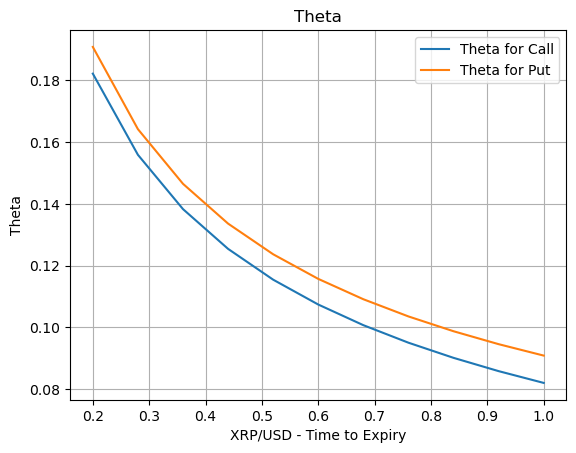

In [48]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('XRP/USD - Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

### 5 - RHO,  𝜌, Unit: Dollar $

##### Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [49]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [50]:
rho(0.4995, 0.5500, 1, 0.04856, 0, 0.7801, 'call')

0.17074920440274802

In [51]:
rho(0.4995, 0.5500, 1, 0.04856, 0, 0.7801, 'put')

-0.3531808954663761

In [52]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(0.4995, 0.5500, 1, r[i], 0, 0.7801, 'call')
    Rho_Put [i] = rho(0.4995, 0.5500, 1, r[i], 0, 0.7801, 'put')

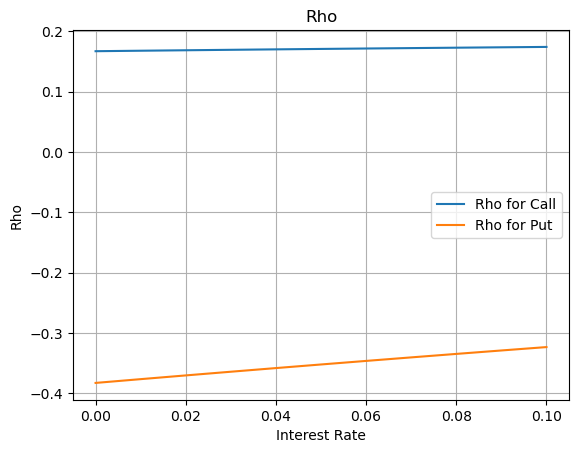

In [53]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

### 6 - VEGA, Unit: Dollar $

##### Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.

In [54]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [55]:
vega(0.4995, 0.5500, 1, 0.04856, 0, 0.7801, 'put')

0.18878362389160488

In [56]:
vega(0.4995, 0.5500, 1, 0.04856, 0, 0.7801, 'call')

0.18878362389160488

In [57]:
vol = np.linspace(0.2,1,11)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(0.4995, 0.5500, 0.25, 0.04856, 1, vol[i], 'put')

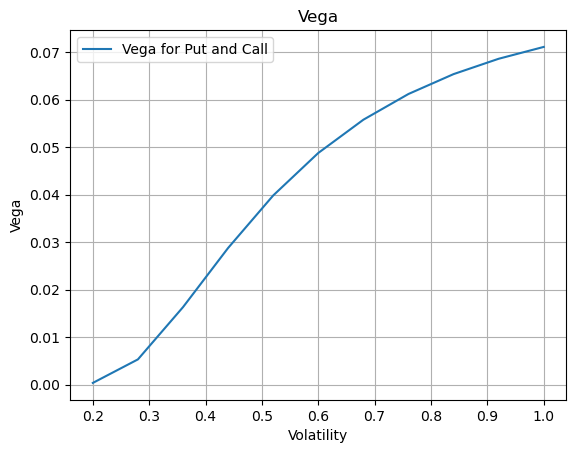

In [58]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put and Call'])

In [59]:
v = vega(0.4995, 0.5500, 1, 0.04856, 0, 0.7801, 'put')
print('The value of Vega is', v.round(4),'.','If volatility increases by 1%, the value of the option increases by $', v.round(4)*0.01, '.')

The value of Vega is 0.1888 . If volatility increases by 1%, the value of the option increases by $ 0.001888 .
